In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Loading weather data

In [2]:
# Read data from a xlsx file
df = pd.read_excel('weather.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
2,2015-01-01 00:00:00,2015,1,1,‡,-3,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0,NaN,22,NaN,63,NaN
3,2015-01-02 00:00:00,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0,T,0,T,1,NaN,27,NaN,50,NaN
4,2015-01-03 00:00:00,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17,NaN,17,NaN,1,NaN,3,NaN,41,NaN


In [3]:
#Use the second row as the header
df_new = pd.read_excel('weather.xlsx', header=2)
df_new.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,‡,-3.0,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0.0,NaN,22.0,NaN,63,NaN
1,2015-01-02,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0.0,T,0.0,T,1.0,NaN,27.0,NaN,50,NaN
2,2015-01-03,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17.0,NaN,17.0,NaN,1.0,NaN,3.0,NaN,41,NaN
3,2015-01-04,2015,1,4,‡,3.0,NaN,-8.6,NaN,-2.8,...,0.4,NaN,27.2,NaN,8.0,NaN,26.0,NaN,69,NaN
4,2015-01-05,2015,1,5,‡,-5.3,NaN,-17.9,NaN,-11.6,...,0.0,T,0.0,T,6.0,NaN,27.0,NaN,74,NaN


# Checking Data Types

In [4]:
#checking the data type
df_new.dtypes

Date/Time                    datetime64[ns]
Year                                  int64
Month                                 int64
Day                                   int64
Data Quality                         object
Max Temp (°C)                       float64
Max Temp Flag                       float64
Min Temp (°C)                       float64
Min Temp Flag                        object
Mean Temp (°C)                      float64
Mean Temp Flag                       object
Heat Deg Days (°C)                  float64
Heat Deg Days Flag                   object
Cool Deg Days (°C)                  float64
Cool Deg Days Flag                   object
Total Rain (mm)                     float64
Total Rain Flag                      object
Total Snow (cm)                     float64
Total Snow Flag                      object
Total Precip (mm)                   float64
Total Precip Flag                    object
Snow on Grnd (cm)                   float64
Snow on Grnd Flag               

In [5]:
# Setting the 'Date/Time' column as the index
df_new.set_index('Date/Time', inplace=True)

# Handling Null Values

In [6]:
# checking null values
df_new.isnull().sum()

Year                           0
Month                          0
Day                            0
Data Quality                   0
Max Temp (°C)                  0
Max Temp Flag                365
Min Temp (°C)                  0
Min Temp Flag                364
Mean Temp (°C)                 0
Mean Temp Flag               364
Heat Deg Days (°C)             0
Heat Deg Days Flag           364
Cool Deg Days (°C)             0
Cool Deg Days Flag           364
Total Rain (mm)               13
Total Rain Flag              322
Total Snow (cm)                4
Total Snow Flag              332
Total Precip (mm)             10
Total Precip Flag            302
Snow on Grnd (cm)            256
Snow on Grnd Flag            365
Dir of Max Gust (10s deg)     82
Dir of Max Gust Flag         364
Spd of Max Gust (km/h)         1
Spd of Max Gust Flag         364
dtype: int64

In [7]:
df_new.describe()

,Year,Month,Day,Max Temp (°C),Max Temp Flag,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg)
count,365.0,365.000000,365.000000,365.000000,0.0,365.000000,365.000000,365.000000,365.000000,352.000000,361.00000,355.000000,109.000000,0.0,283.000000
mean,2015.0,6.526027,15.720548,11.974521,NaN,2.282466,7.139452,11.782192,0.921644,2.464205,0.52410,2.998310,9.559633,NaN,20.190813
std,0.0,3.452584,8.808321,13.060905,NaN,12.702354,12.782959,11.750686,1.883560,6.229666,2.53002,6.565627,6.951460,NaN,9.185576
min,2015.0,1.000000,1.000000,-18.000000,NaN,-27.500000,-20.900000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,1.000000
25%,2015.0,4.000000,8.000000,2.000000,NaN,-6.100000,-2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,NaN,15.000000
50%,2015.0,7.000000,16.000000,13.300000,NaN,4.000000,8.600000,9.400000,0.000000,0.000000,0.00000,0.000000,10.000000,NaN,23.000000
75%,2015.0,10.000000,23.000000,23.800000,NaN,13.600000,19.000000,20.000000,1.000000,1.250000,0.00000,3.000000,16.000000,NaN,26.000000
max,2015.0,12.000000,31.000000,32.200000,NaN,21.900000,27.100000,38.900000,9.100000,47.200000,39.20000,47.200000,23.000000,NaN,36.000000


In [8]:
#dropping the columns having more then 70% null values
#calculating the percentage of null values in each column
null_percentage = (df_new.isnull().sum() / len(df_new)) * 100

#the threshold (70% in this case)
threshold = 70

#identifing columns with null percentage exceeding the threshold
columns_to_drop = null_percentage[null_percentage > threshold].index

#droping the identified columns
df_new = df_new.drop(columns=columns_to_drop)
df_new.head()

,Year,Month,Day,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
Date/Time,,,,,,,,,,,,,,
2015-01-01,2015,1,1,‡,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,22.0,63
2015-01-02,2015,1,2,‡,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,27.0,50
2015-01-03,2015,1,3,‡,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,3.0,41
2015-01-04,2015,1,4,‡,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,26.0,69
2015-01-05,2015,1,5,‡,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,27.0,74


In [9]:
#replcaing null values present in columns (TotalRain(mm),TotalSnow(cm), TotalPrecip(mm), Dir of MaxGust, Spd of MaxGust) with zero
df_new.fillna(0, inplace=True)

In [10]:
print(f"The Shape of the new data is {df_new.shape}\n")
print(df_new.isnull().sum())

The Shape of the new data is (365, 14)

Year                         0
Month                        0
Day                          0
Data Quality                 0
Max Temp (°C)                0
Min Temp (°C)                0
Mean Temp (°C)               0
Heat Deg Days (°C)           0
Cool Deg Days (°C)           0
Total Rain (mm)              0
Total Snow (cm)              0
Total Precip (mm)            0
Dir of Max Gust (10s deg)    0
Spd of Max Gust (km/h)       0
dtype: int64


# Dropping unwanted columns

In [11]:
#Dropping the columns
df_new.drop(columns=['Data Quality', 'Year', 'Month','Day'], inplace=True)

In [12]:
# Converting Categorical column (Spd of Max Gust) into Numerical

In [13]:
#checking the unique values present inside column (Spd of Max Gust)
df_new['Spd of Max Gust (km/h)'].unique()

array([63, 50, 41, 69, 74, 32, 48, 57, 37, '<31', 35, 61, 44, 56, 39, 52,
       46, 33, 65, 59, 43, 67, 54, 72, 76, 70, 80, 0, 83, 98],
      dtype=object)

In [14]:
# Convert values '<31' to 31 in the 'Age' column using apply and a lambda function
df_new['Spd of Max Gust (km/h)'] = df_new['Spd of Max Gust (km/h)'].apply(lambda x: 31 if x == '<31' else x)
df_new['Spd of Max Gust (km/h)'].unique()

array([63, 50, 41, 69, 74, 32, 48, 57, 37, 31, 35, 61, 44, 56, 39, 52, 46,
       33, 65, 59, 43, 67, 54, 72, 76, 70, 80,  0, 83, 98], dtype=int64)

# Splitting Into numerical and categorical columns

In [15]:
numerical_feature = [feature for feature in df_new.columns if df_new[feature].dtypes != 'O']
categorical_feature = [feature for feature in df_new.columns if feature not in numerical_feature]
print("Total numerical features {}".format(len(numerical_feature)))
print("Total categorical features {}".format(len(categorical_feature)))

Total numerical features 10
Total categorical features 0


In [16]:
print("The Numerical Features are ---> {}\n".format(numerical_feature))
print("The Categorical Features are ---> {} \n".format(categorical_feature))

The Numerical Features are ---> ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)']

The Categorical Features are ---> [] 



# Plotting heatmap

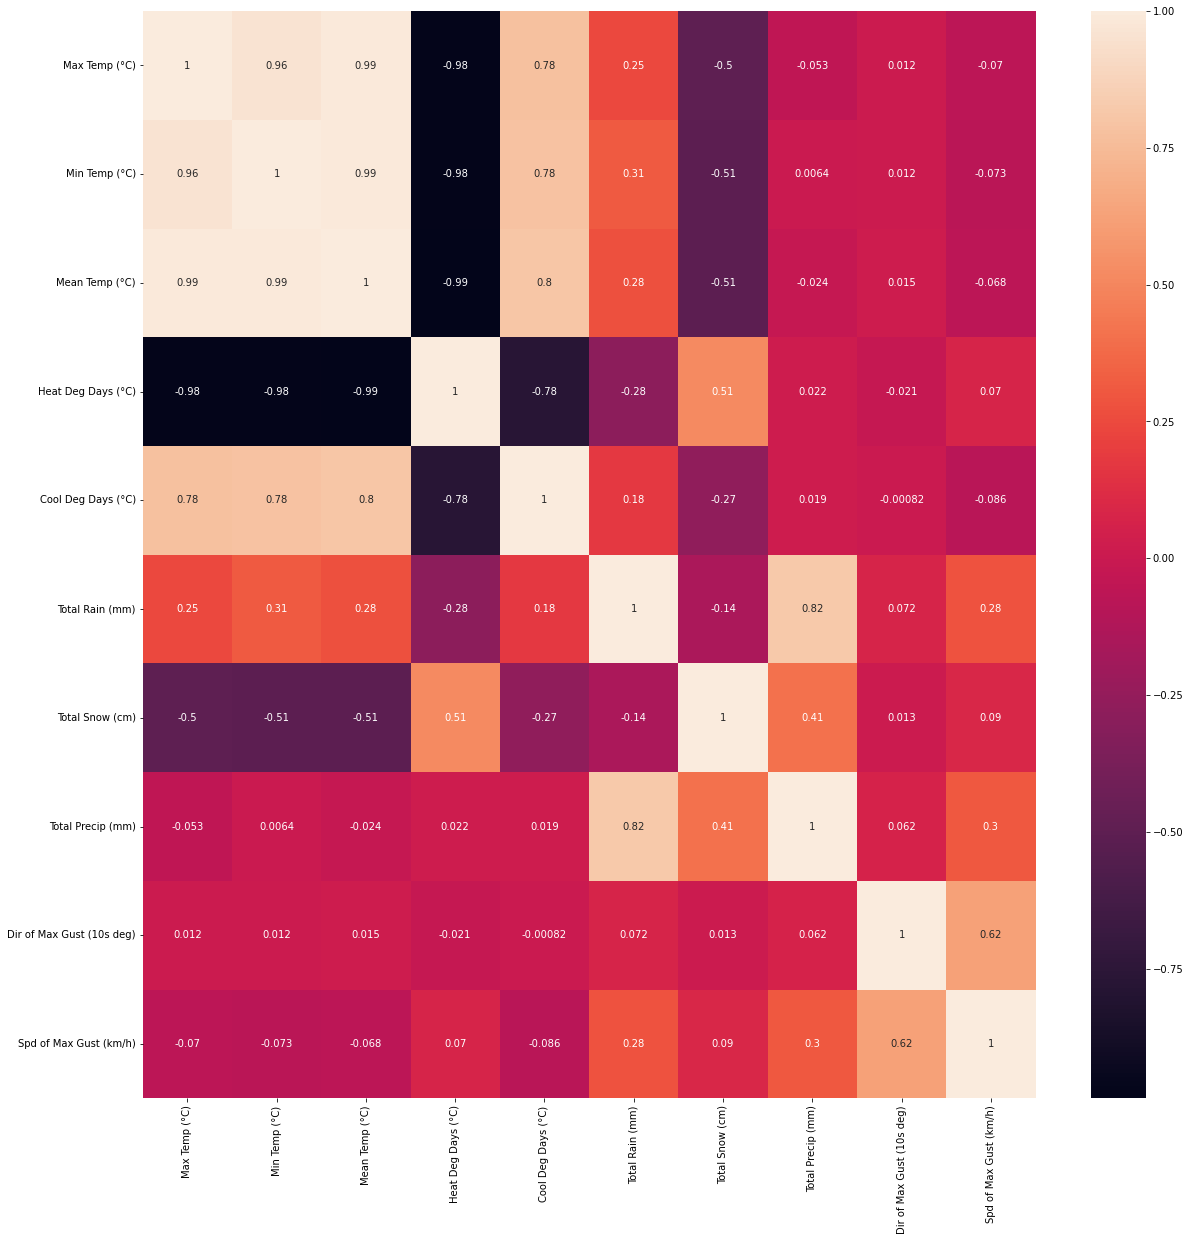

In [17]:
#To visualize the correlation between variables in a dataset
corrmat = df_new.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

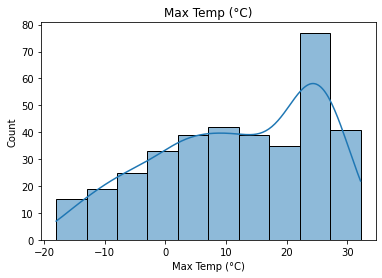

<Figure size 1080x1080 with 0 Axes>

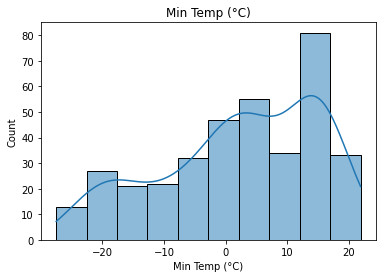

<Figure size 1080x1080 with 0 Axes>

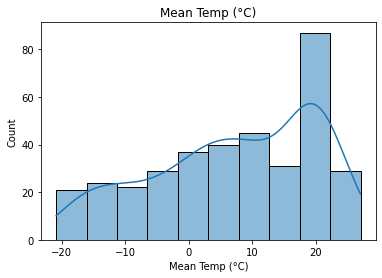

<Figure size 1080x1080 with 0 Axes>

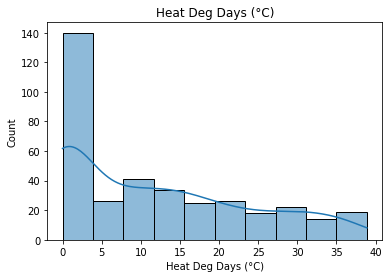

<Figure size 1080x1080 with 0 Axes>

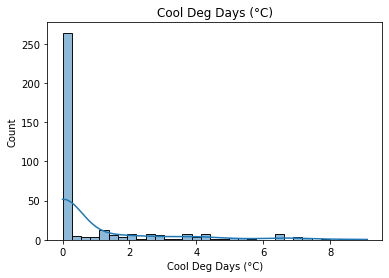

<Figure size 1080x1080 with 0 Axes>

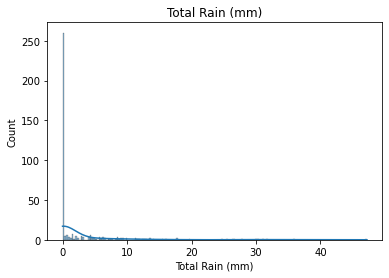

<Figure size 1080x1080 with 0 Axes>

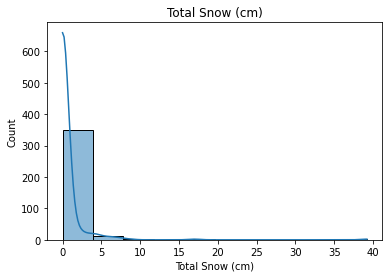

<Figure size 1080x1080 with 0 Axes>

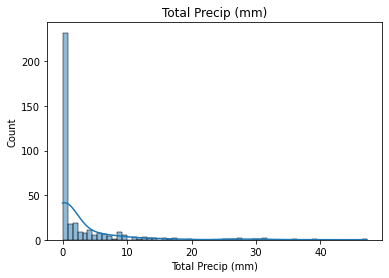

<Figure size 1080x1080 with 0 Axes>

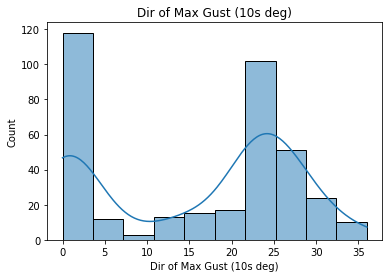

<Figure size 1080x1080 with 0 Axes>

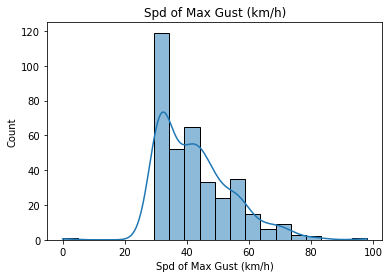

<Figure size 1080x1080 with 0 Axes>

In [27]:
for feature in numerical_feature:
    data=df_new.copy()
    sns.histplot(df_new[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

# Checking Outliers

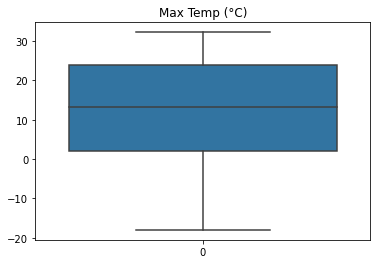

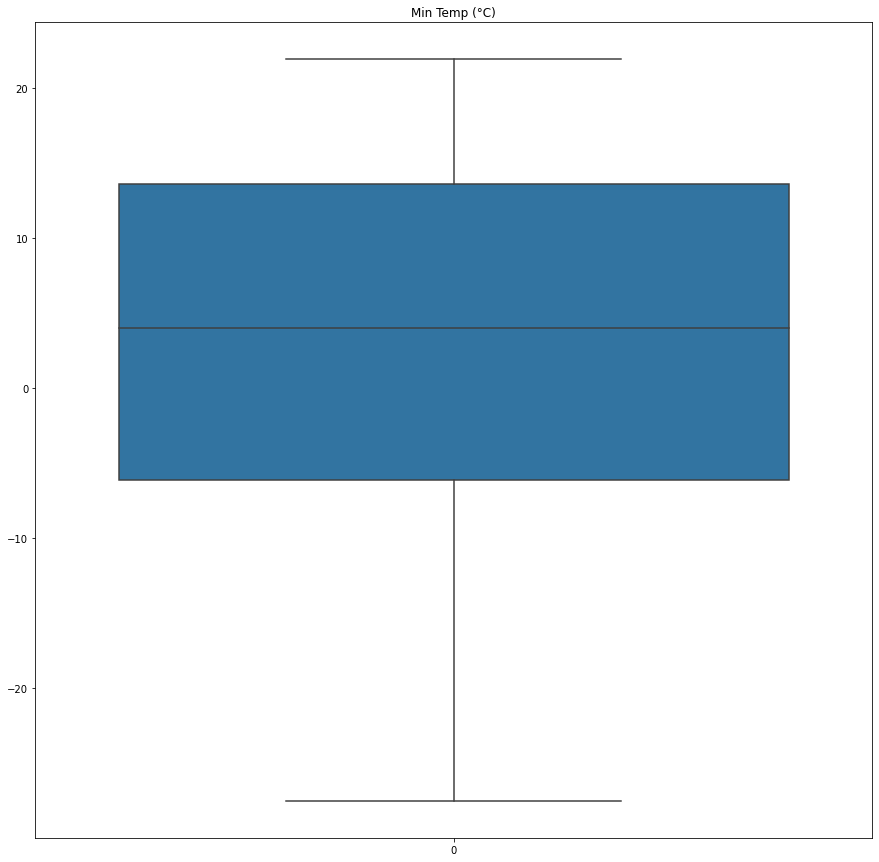

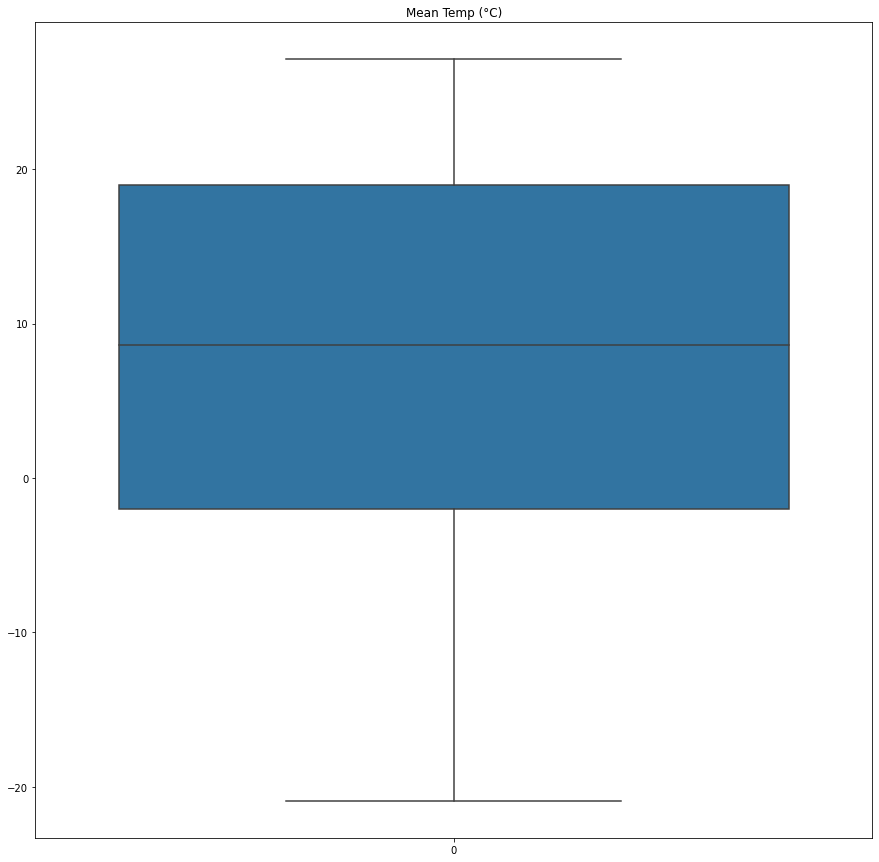

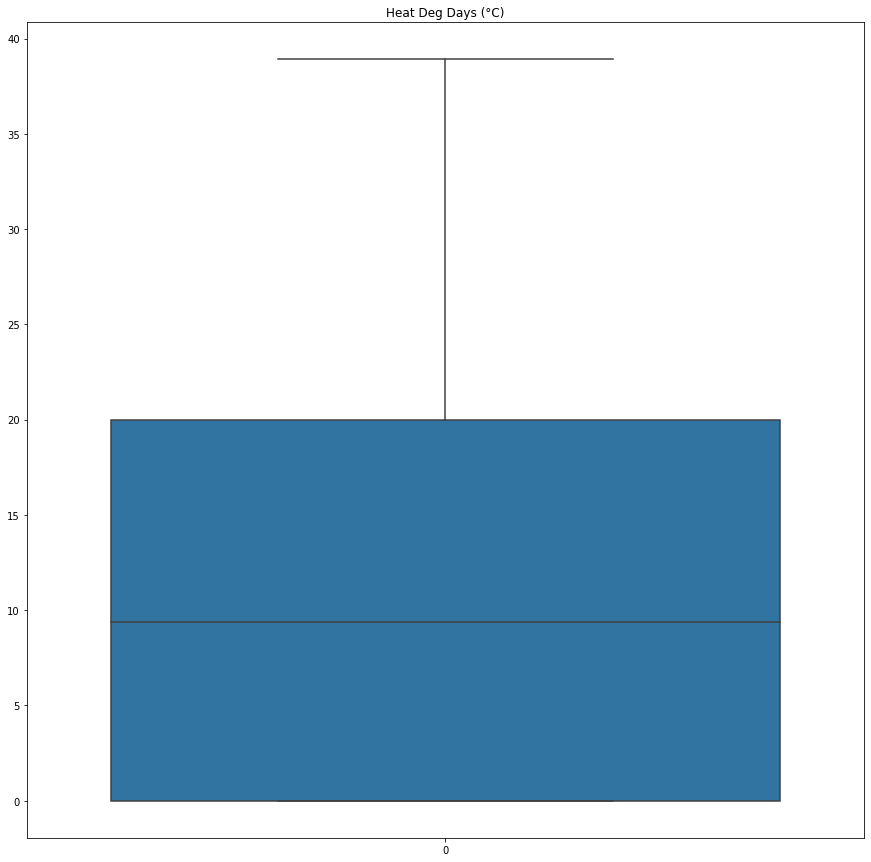

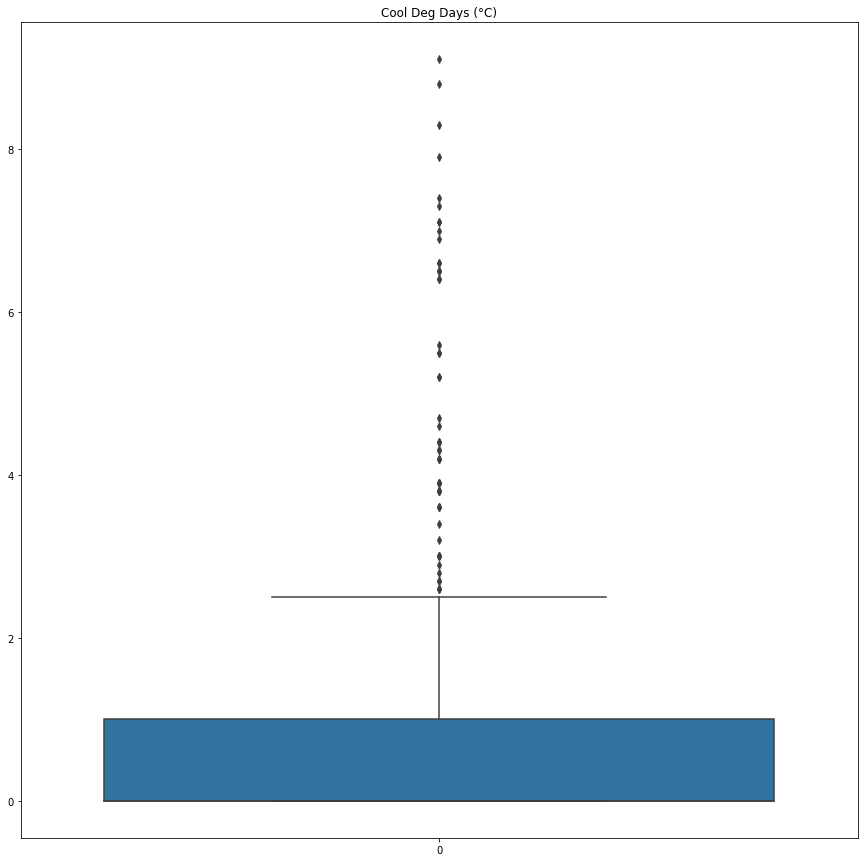

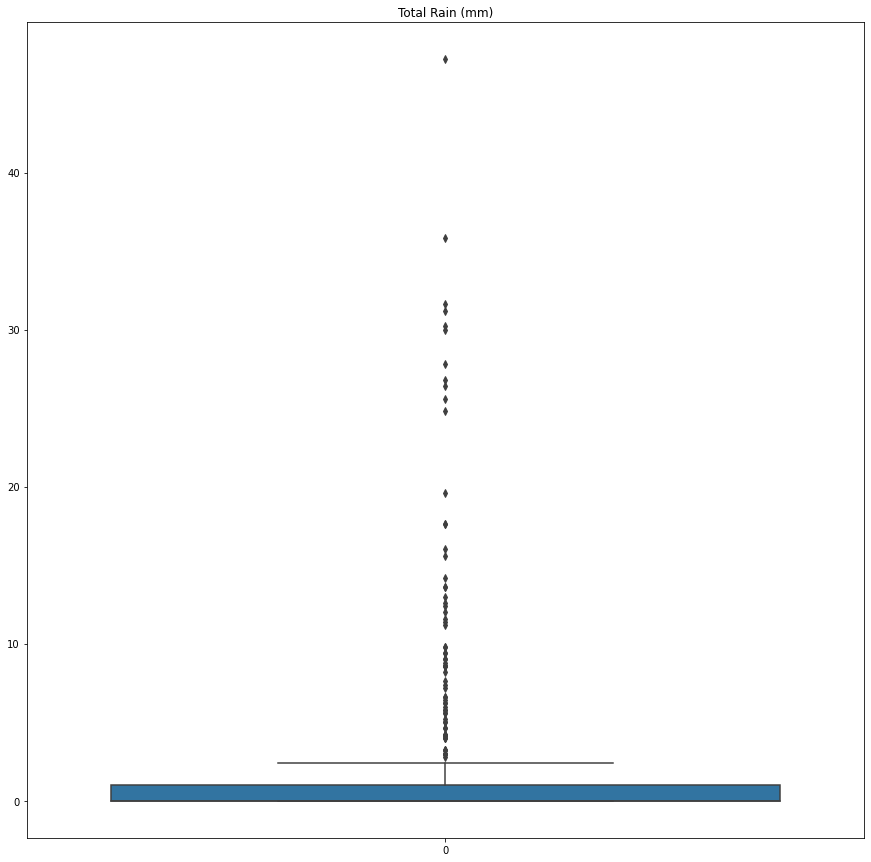

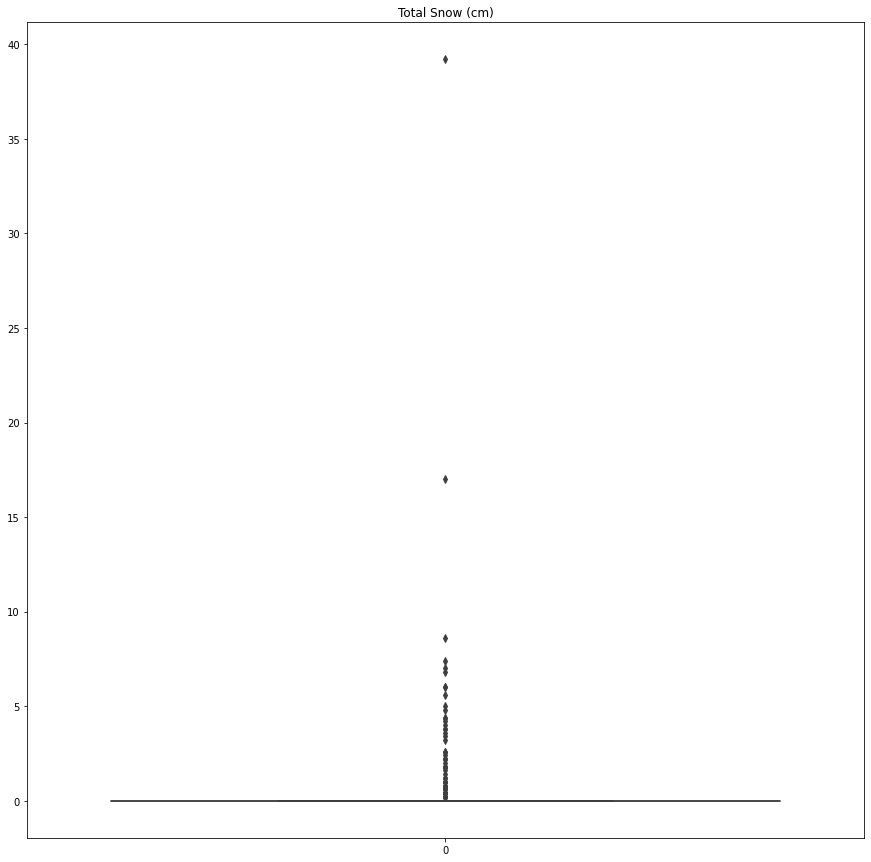

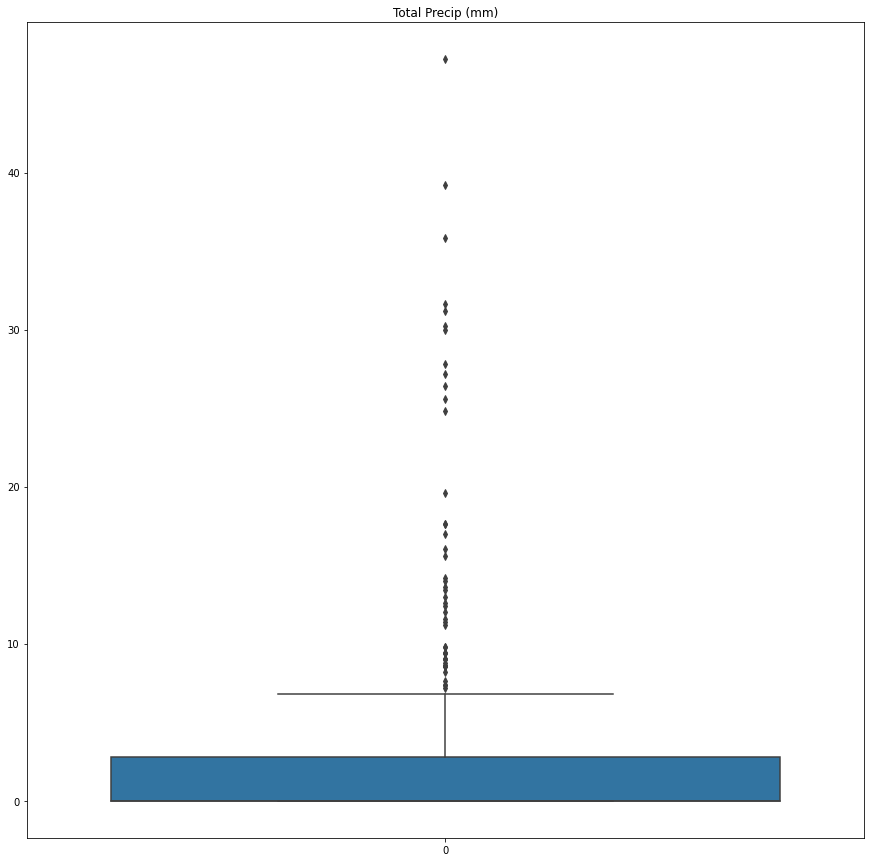

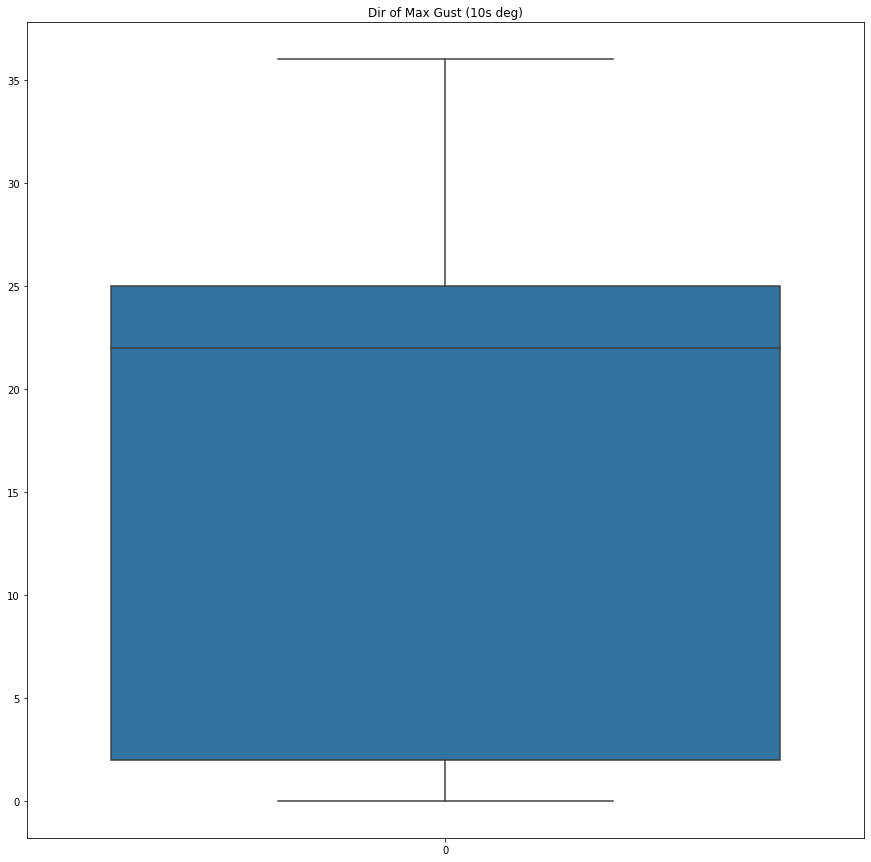

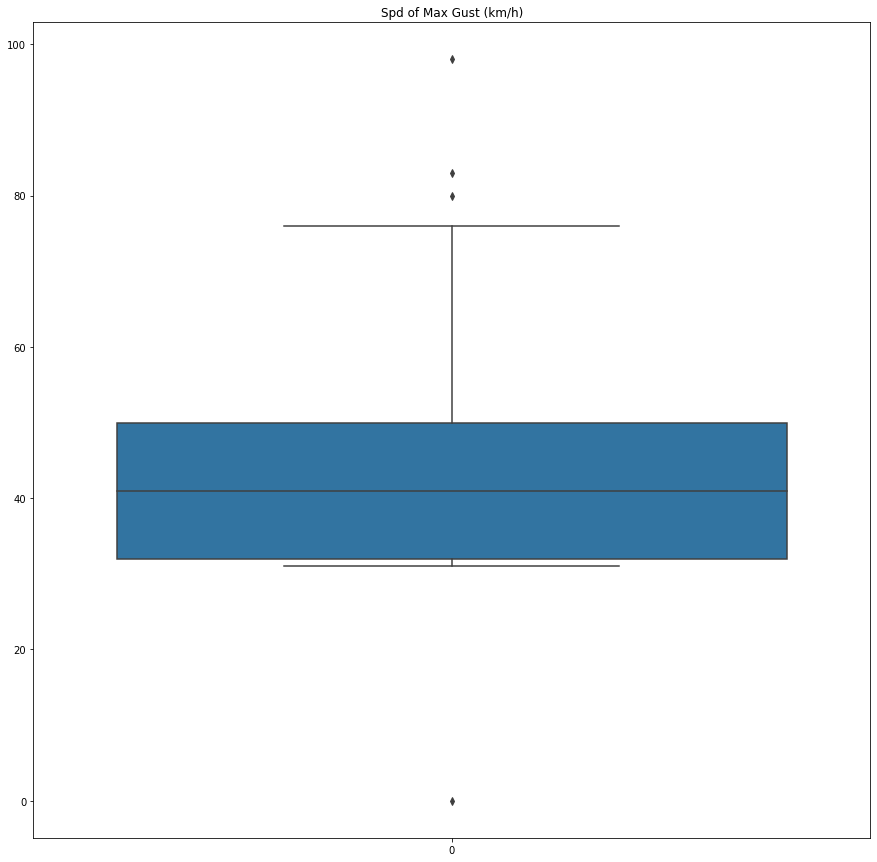

<Figure size 1080x1080 with 0 Axes>

In [30]:
#Using For Loop to plot a boxplot for all the numerical features to see the outliers
for feature in numerical_feature:
    data=df_new.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

The outliers in the dataset might represent unusual rental patterns, such as exceptionally high or low rental counts on specific days.

We will not Handle the outliers

# Loading Check Point DataSet

In [39]:
df_check= df = pd.read_excel('Checkpoint_count.xlsx')
df_check.head()

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


In [40]:
#Summing the number of cycle
#Sum data row-wise (horizontally)
row_sum = df_check.sum(axis=1)

# Add the row-wise sum as a new column in the DataFrame
df_check['total_rented_cycle'] = row_sum
df_check.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_12504\2045684370.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_sum = df_check.sum(axis=1)


,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,total_rented_cycle
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,...,58,91,24,3,NaN,17,78,21,6,531.0
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,...,109,177,32,13,NaN,11,57,77,4,804.0
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,...,71,131,33,5,NaN,14,174,40,5,774.0
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,...,6,11,6,1,NaN,1,20,6,0,158.0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,...,0,5,49,20,NaN,0,41,56,10,371.0


# merging rented cycle data with weather dataset